In [485]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

chunk = 'chunk21'

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk21_200per_matched.fits'
fn2 = 'dr3_elgs_really_masked_chunk21.fits'
fn_obiwan = 'sgc_run_obiwan_really_masked_chunk21.fits'
fn_sim = 'sgc_run_sim_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)
sim = fits.getdata(topdir+fn_sim)
sim_m=sim
DAT2 = fits.getdata(topdir+fn2)

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,'ccd density')

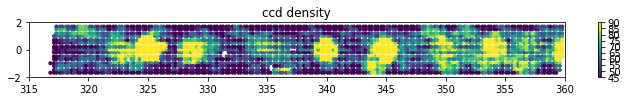

In [237]:
#ccd density check
ccd_list = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_200per_run/BrickccdNum.txt'
ccds = np.loadtxt(ccd_list, dtype = np.str).transpose()
RA = []
DEC = []
for i in range(len(ccds[0])):
    ra = int(ccds[0][i][:4])/10.
    if ccds[0][i][4]=='m':
        dec = (-1.)*int(ccds[0][i][5:])/10.
    else:
        dec = int(ccds[0][i][5:])/10.
    RA.append(ra)
    DEC.append(dec)
RA = np.array(RA)
DEC = np.array(DEC)

plt.figure(figsize=(12,1))
plt.scatter(RA,DEC,c = ccds[1].astype(int),vmax = 90,vmin = 45, marker = '.')
plt.colorbar()
plt.gca().set_xlim(315,360)
plt.gca().set_ylim(-2,2)
plt.title('ccd density')

Text(0.5,1,'dens fluct obiwan substract mean: 0.296, +/- 1.5 sigma')

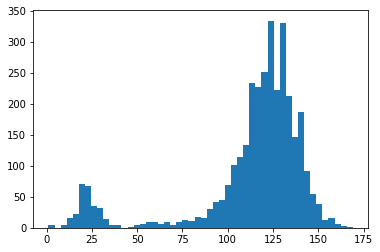

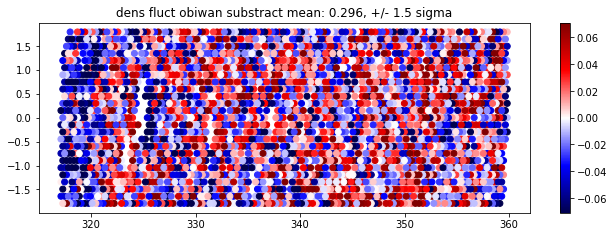

In [198]:
chunk = 'chunk21'
'''
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk21_200per_matched.fits'
fn2 = 'dr3_elgs_really_masked_chunk21.fits'
fn_obiwan = 'sgc_run_obiwan_really_masked_chunk21.fits'
fn_sim = 'sgc_run_sim_really_masked_chunk21.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)
sim = fits.getdata(topdir+fn_sim)
sim_m=sim
DAT2 = fits.getdata(topdir+fn2)
'''

p_obiwan = topdir+'sgc_200per_w_psfdg_obiwan_really_masked_chunk21.fits'
p_sim = topdir+'sgc_200per_w_psfdg_sim_really_masked_chunk21.fits'
obiwan = fits.getdata(p_obiwan)
sim = fits.getdata(p_sim)
sim_m=sim
fn = 'eBOSS_ELG_full_ALL_v4.dat_really_masked_chunk21_200per_matched.fits'
DAT = fits.getdata(topdir+fn)


def MAG(mag, data = obiwan):
    g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
    if mag == 'g':
        return g
    if mag == 'r':
        return r_mag
    if mag == 'z':
        return z_mag

def compare_obiwan(res = 256, obiwan = obiwan):
    import healpy as hp
    #mean <mag-mag_true> plot g,r,z
    pixs = hp.ang2pix(res,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
    pixs2 = hp.ang2pix(res,sim_m['ra'], sim_m['dec'], nest = True, lonlat = True)
    pixs3 = hp.ang2pix(res,DAT['ra'],DAT['dec'],nest = True, lonlat = True)
    N = 12*res**2
    hist_n = np.zeros(N)
    hist_mag_diff_g = np.zeros(N)
    hist_mag_diff_r = np.zeros(N)
    hist_mag_diff_z = np.zeros(N)
    mag_g = MAG('g',data = obiwan)
    mag_r =  MAG('r', data = obiwan)
    mag_z = MAG('z', data = obiwan)
    
    for i in range(len(pixs)):
        n = pixs[i]
        mag_diff_g = mag_g[i] - obiwan['sim_gflux'][i]
        mag_diff_r = mag_r[i] - obiwan['sim_rflux'][i]
        mag_diff_z = mag_z[i] - obiwan['sim_zflux'][i]
        hist_mag_diff_g[n]+=mag_diff_g
        hist_mag_diff_r[n]+=mag_diff_r
        hist_mag_diff_z[n]+=mag_diff_z
        hist_n[n]+=1
    hist2 = np.zeros(N)
    for i in range(len(pixs2)):
        n = pixs2[i]
        hist2[n]+=1
    hist3 = np.zeros(N)
    for i in range(len(pixs3)):
        n = pixs3[i]
        hist3[n]+=1

    
    N = 12*res**2
    ra,dec = hp.pix2ang(res,np.arange(N), nest = True,lonlat = True)
    col1 = fits.Column(name = 'ra', array = ra, format = 'D')
    col2 = fits.Column(name = 'dec', array = dec, format = 'D')
    # # of obiwans in each pixel
    col3 = fits.Column(name = 'num_obiwan', array = hist_n, format = 'D')
    col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
    col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
    col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')
    # # of uniform randoms in each pixel
    col7 = fits.Column(name = 'num_uniform', array = hist2, format = 'D')
    # # of real elgs in each pixel
    col8 = fits.Column(name = 'num_elgs', array = hist3, format = 'D')
    
    #bad pixels
    g = obiwan['sim_gflux']
    rz = obiwan['sim_rflux'] - obiwan['sim_zflux']
    gr = obiwan['sim_gflux'] - obiwan['sim_rflux']
    color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
    dat_bad = obiwan[color_sgc==False]
    pixs_bad = hp.ang2pix(res,dat_bad['ra'],dat_bad['dec'],nest = True, lonlat = True)
    hist_bad = np.zeros(N)
    for i in range(len(pixs_bad)):
        n = pixs_bad[i]
        hist_bad[n]+=1
    col9 = fits.Column(name = 'num_bad', array = hist_bad, format = 'D')
    dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6,col7,col8,col9]).data
    uni = dat['num_uniform']
    sel = (uni>0)
    return dat[sel]
#obiwan rearanged in healpix format
compact_obiwan = compare_obiwan()

pt = plt.hist(compact_obiwan['num_uniform'],bins=50)

#have a cut @ 80
def cut_uni(cut_set = 80):
    uni = compact_obiwan['num_uniform']
    sel = (uni>80)
    hp_obiwan = compact_obiwan[sel]
    return hp_obiwan
hp_obiwan = cut_uni()

plt.figure(figsize = (11,3.5))
color = hp_obiwan['num_obiwan']/hp_obiwan['num_uniform']
mean = color.mean()
std = color.std()
plt.scatter(hp_obiwan['ra'],hp_obiwan['dec'],c=color-mean,cmap = 'seismic',vmin = -std*1.5,vmax = 1.5*std)
plt.colorbar()
plt.title('dens fluct '+ 'obiwan' +' substract mean: %.3f, +/- 1.5 sigma' % mean)

In [ ]:
#targets go from g>21.825 to g<21.825

(-2, 2)

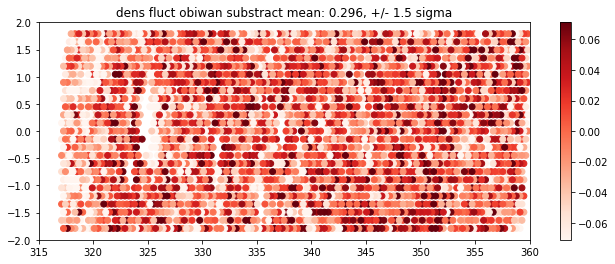

In [164]:
plt.figure(figsize = (11,4))
color = hp_obiwan['num_obiwan']/hp_obiwan['num_uniform']
mean = color.mean()
std = color.std()
plt.scatter(hp_obiwan['ra'],hp_obiwan['dec'],c=color-mean,vmin = -std*1.5,cmap = 'Reds', vmax = 1.5*std,alpha=1.0)

plt.title('dens fluct '+ 'obiwan' +' substract mean: %.3f, +/- 1.5 sigma' % mean)



#plt.scatter(RA,DEC,c = ccds[1].astype(int),vmax = 90,vmin=50,marker = 'o', alpha = 1.0,cmap = 'Blues')
plt.colorbar()
plt.gca().set_xlim(315,360)
plt.gca().set_ylim(-2,2)





Text(0.5,1,'number density divided by ccd density')

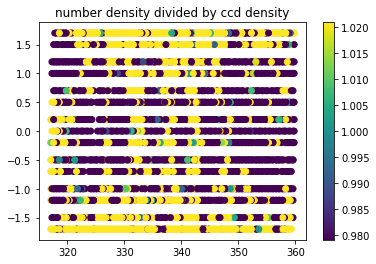

In [231]:
color = ob['num_obiwan']/ob['num_uniform']
mean = (color/ccd_num).mean()
std = (color/ccd_num).std()
plt.scatter(ra,dec, c = color/ccd_num/mean,vmax = 1+10*std,vmin = 1-10*std)
plt.colorbar()
plt.title('number density divided by ccd density')

Text(0.5,1,'histgram of above plot')

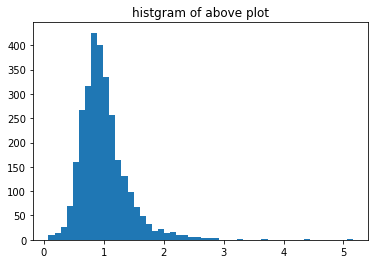

In [236]:
p = plt.hist(color/ccd_num/mean,bins = 50)
plt.title('histgram of above plot')

Text(0.5,1,'psfdepth_g ave per pix')

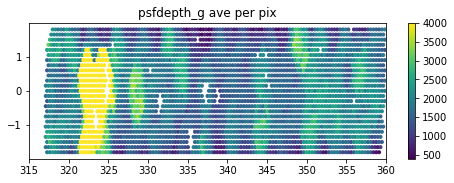

In [232]:
p_obiwan = topdir+'sgc_200per_w_psfdg_obiwan_really_masked_chunk21.fits'
p_sim = topdir+'sgc_200per_w_psfdg_sim_really_masked_chunk21.fits'
obiwan = fits.getdata(p_obiwan)
sim = fits.getdata(p_sim)

#check missing rate:g=22.4-22.825
#I need data on psfdepth_g!
g_mag_sim = obiwan['psfdepth_g']

import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = False, lonlat = True)

sim_arr = np.zeros(npo)
obiwan_arr = np.zeros(npo)
psfdepth_g_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_obiwan)):
    n = pix_obiwan[i]
    psfdepth_g_arr[n]+=obiwan['psfdepth_g'][i]
    obiwan_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>60]
psfdepth_g_arr_new = psfdepth_g_arr[sim_arr>60]
ra_new = ra[sim_arr>60]
dec_new = dec[sim_arr>60]
obiwan_new = obiwan_arr[sim_arr>60]

plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=psfdepth_g_arr_new/obiwan_new, marker = '.',vmax = 4000)
plt.gca().set_xlim(315,360)
plt.colorbar()
plt.title('psfdepth_g ave per pix')

Text(0.5,1,'psfdepth_r ave per pix')

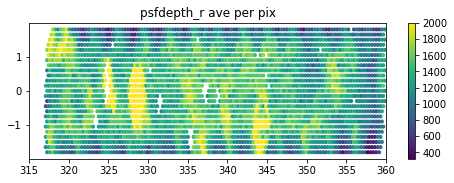

In [233]:
p_obiwan = topdir+'sgc_200per_w_psfdg_obiwan_really_masked_chunk21.fits'
p_sim = topdir+'sgc_200per_w_psfdg_sim_really_masked_chunk21.fits'
obiwan = fits.getdata(p_obiwan)
sim = fits.getdata(p_sim)

#check missing rate:g=22.4-22.825
#I need data on psfdepth_g!
g_mag_sim = obiwan['psfdepth_r']

import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = False, lonlat = True)

sim_arr = np.zeros(npo)
obiwan_arr = np.zeros(npo)
psfdepth_g_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_obiwan)):
    n = pix_obiwan[i]
    psfdepth_g_arr[n]+=obiwan['psfdepth_r'][i]
    obiwan_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>60]
psfdepth_g_arr_new = psfdepth_g_arr[sim_arr>60]
ra_new = ra[sim_arr>60]
dec_new = dec[sim_arr>60]
obiwan_new = obiwan_arr[sim_arr>60]

plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=psfdepth_g_arr_new/obiwan_new, marker = '.',vmax = 2000)
plt.gca().set_xlim(315,360)
plt.colorbar()
plt.title('psfdepth_r ave per pix')

Text(0.5,1,'psfdepth_z ave per pix')

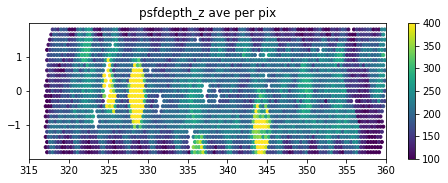

In [234]:
p_obiwan = topdir+'sgc_200per_w_psfdg_obiwan_really_masked_chunk21.fits'
p_sim = topdir+'sgc_200per_w_psfdg_sim_really_masked_chunk21.fits'
obiwan = fits.getdata(p_obiwan)
sim = fits.getdata(p_sim)

#check missing rate:g=22.4-22.825
#I need data on psfdepth_g!
g_mag_sim = obiwan['psfdepth_z']

import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_sim = hp.ang2pix(res, sim['ra'], sim['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
pix_obiwan = hp.ang2pix(res, obiwan['ra'], obiwan['dec'], nest = False, lonlat = True)

sim_arr = np.zeros(npo)
obiwan_arr = np.zeros(npo)
psfdepth_g_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_sim)):
    n = pix_sim[i]
    sim_arr[n]+=1
for i in range(len(pix_obiwan)):
    n = pix_obiwan[i]
    psfdepth_g_arr[n]+=obiwan['psfdepth_z'][i]
    obiwan_arr[n]+=1

sim_arr_new = sim_arr[sim_arr>60]
psfdepth_g_arr_new = psfdepth_g_arr[sim_arr>60]
ra_new = ra[sim_arr>60]
dec_new = dec[sim_arr>60]
obiwan_new = obiwan_arr[sim_arr>60]

plt.figure(figsize = (8,2.5))
plt.scatter(ra_new,dec_new,c=psfdepth_g_arr_new/obiwan_new, marker = '.',vmax=400,vmin=100)
plt.gca().set_xlim(315,360)
plt.colorbar()
plt.title('psfdepth_z ave per pix')

In [486]:
fn = topdir+'sgc_200per_sm_tc_match_part1_really_masked_chunk21.fits'
sim = fits.getdata(fn)
def goot_out_ratio(quantity_in, quantity_out, good_in,bad_out,number, sim = sim):
    mag_in = quantity_in
    mag_out = quantity_out
    sel_good = eval('mag_in'+good_in+str(number))
    mag_good = eval('mag_out'+'[sel_good]')
    sim_good = sim[sel_good]
    sel_bad  = eval('mag_good'+bad_out+str(number))&(sim_good['matched']==True)
    sim_bad = sim_good[sel_bad]
    print(len(sim_good),len(sim_bad),len(sim))
    
    import healpy as hp
    res=256
    npo = 12*res**2
    pixs = np.arange(npo)
    pix_good = hp.ang2pix(res, sim_good['ra'], sim_good['dec'], nest = False, lonlat = True)
    pix_bad = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'], nest = False, lonlat = True)
    ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
    good_arr = np.zeros(npo)
    bad_arr = np.zeros(npo)
    pixs = np.arange(npo)
    for i in range(len(pix_good)):
        n = pix_good[i]
        good_arr[n]+=1
    for i in range(len(pix_bad)):
        n = pix_bad[i]
        bad_arr[n]+=1
    return bad_arr,good_arr,ra,dec
#get good_arr,good_arr        

In [487]:
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
bad_arr,good_arr,ra,dec = goot_out_ratio(in_g , out_g, '>', '<', 21.825)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


369644 16842 372756


In [364]:
good_arr_new = good_arr[good_arr>0]

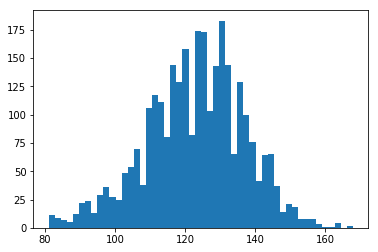

In [488]:
#choose a number 80
p = plt.hist(good_arr_new,bins=50)

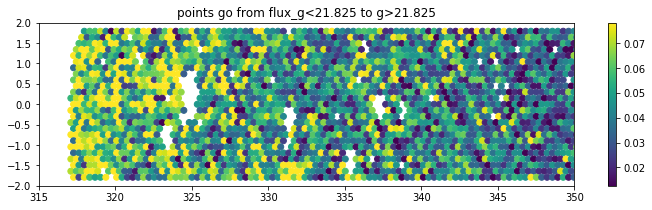

In [489]:
plt.figure(figsize=(12,3))
good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,vmax = mean-1.5*std,vmin = mean+1.5*std,marker = 'o')
plt.title('points go from flux_g<21.825 to g>21.825')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


317319 115148 372756


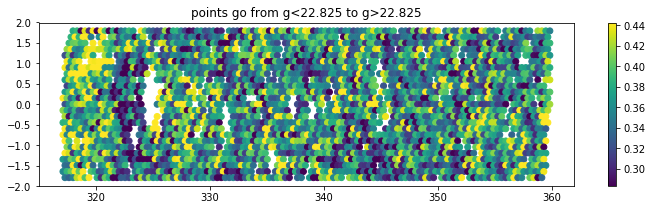

In [371]:
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
bad_arr,good_arr,ra,dec = goot_out_ratio(in_g, out_g, '<', '>=', 22.825)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from g<22.825 to g>22.825')
#plt.gca().set_xlim((315,350))
#plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


296408 13056 372756


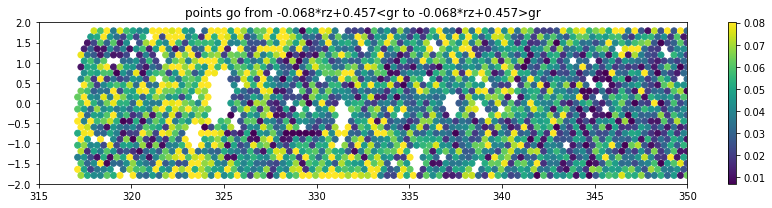

In [374]:
#-0.068*rz+0.457-gr<0
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = -0.068*(in_r-in_z)+0.457-(in_g-in_r)
OUTPUT = -0.068*(out_r-out_z)+0.457-(out_g-out_r)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '<', '>=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
plt.hist(good_arr_new,bins = 50) #choose 70
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>70]
bad_arr_new = bad_arr[good_arr>70]
ra_new = ra[good_arr>70]
dec_new = dec[good_arr>70]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from -0.068*rz+0.457<gr to -0.068*rz+0.457>gr')
plt.gca().set_xlim((315,350))
plt.gca().set_ylim((-2,2))
plt.colorbar()
plt.tight_layout()


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


342837 46825 372756


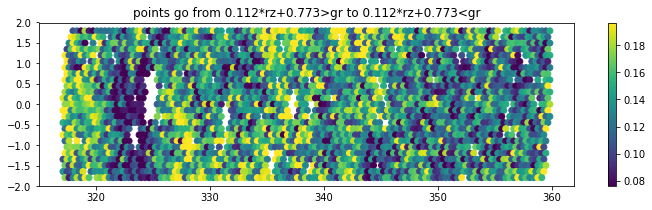

In [378]:
#0.112*rz+0.773-gr>0
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = 0.112*(in_r-in_z)+0.773-(in_g-in_r)
OUTPUT = 0.112*(out_r-out_z)+0.773-(out_g-out_r)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '>', '<=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from 0.112*rz+0.773>gr to 0.112*rz+0.773<gr')
#plt.gca().set_xlim((315,350))
#plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


325760 39716 372756


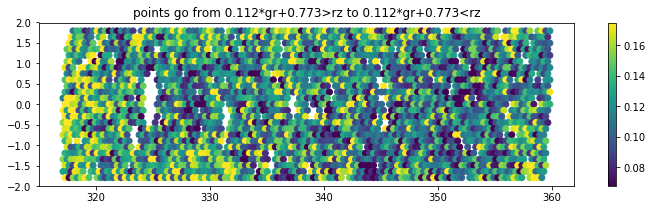

In [382]:
#(0.218*gr+0.571-rz<0)
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = 0.218*(in_g-in_r)+0.571-(in_r-in_z)
OUTPUT = 0.218*(out_g-out_r)+0.571-(out_r-out_z)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '<', '>=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from 0.112*gr+0.773>rz to 0.112*gr+0.773<rz')
#plt.gca().set_xlim((315,350))
#plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()



/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


358525 15808 372756


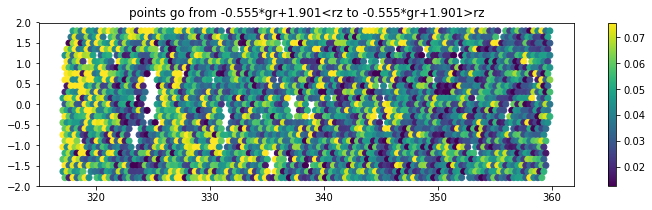

In [381]:
#(-0.555*gr+1.901-rz>0)
out_r = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
out_z = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
out_g = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
in_r = 22.5 - 2.5 * np.log10(sim['sim_rflux'] / sim['sim_mw_transmission_r'])
in_z = 22.5 - 2.5 * np.log10(sim['sim_zflux'] / sim['sim_mw_transmission_z'])
in_g = 22.5 - 2.5 * np.log10(sim['sim_gflux'] / sim['sim_mw_transmission_g'])
INPUT = -0.555*(in_g-in_r)+1.901-(in_r-in_z)
OUTPUT = -0.555*(out_g-out_r)+1.901-(out_r-out_z)
bad_arr,good_arr,ra,dec = goot_out_ratio(INPUT, OUTPUT, '>', '<=', 0)

good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean-1.5*std,vmin = mean+1.5*std)
plt.title('points go from -0.555*gr+1.901<rz to -0.555*gr+1.901>rz')
#plt.gca().set_xlim((315,350))
#plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()

In [401]:
#all source are deteceted
fn = topdir+'sgc_200per_sm_tc_match_part1_really_masked_chunk21.fits'
sim = fits.getdata(fn)
set(sim['matched'])

{True}

In [408]:
sim_bad = sim[sim['flux_g']<=0]
sim_good = sim
import healpy as hp
res=256
npo = 12*res**2
pixs = np.arange(npo)
pix_good = hp.ang2pix(res, sim_good['ra'], sim_good['dec'], nest = False, lonlat = True)
pix_bad = hp.ang2pix(res, sim_bad['ra'], sim_bad['dec'], nest = False, lonlat = True)
ra,dec = hp.pix2ang(res, pixs, nest = False, lonlat = True)
good_arr = np.zeros(npo)
bad_arr = np.zeros(npo)
pixs = np.arange(npo)
for i in range(len(pix_good)):
        n = pix_good[i]
        good_arr[n]+=1
for i in range(len(pix_bad)):
        n = pix_bad[i]
        bad_arr[n]+=1

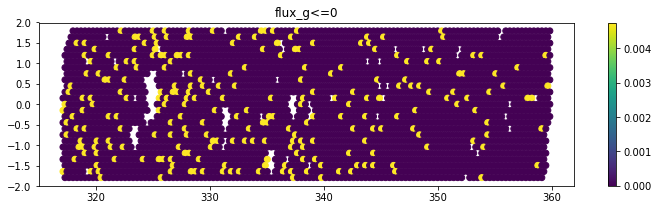

In [412]:
good_arr_new = good_arr[good_arr>0]
plt.figure(figsize=(12,3))
#plt.subplot(2,1,1)
#plt.hist(good_arr_new,bins = 50) #choose 80
#plt.subplot(2,1,2)

good_arr_new = good_arr[good_arr>80]
bad_arr_new = bad_arr[good_arr>80]
ra_new = ra[good_arr>80]
dec_new = dec[good_arr>80]
mean = (bad_arr_new/good_arr_new).mean()
std = (bad_arr_new/good_arr_new).std()
plt.scatter(ra_new,dec_new, c= bad_arr_new/good_arr_new,marker = 'o',vmax = mean+1.5*std,vmin = 0)
plt.title('flux_g<=0')
#plt.gca().set_xlim((315,350))
#plt.gca().set_ylim((-2,2))
plt.colorbar()
#plt.tight_layout()

In [410]:
len(sim[sim['flux_g']<=0])

284

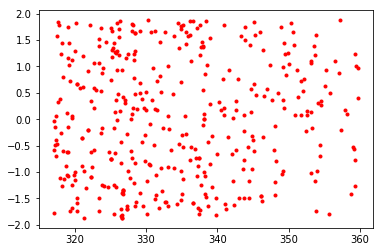

In [415]:
sim_bad = sim[((sim['flux_g']>0)&(sim['flux_r']>0)&(sim['flux_z']>0))==False]
plt.plot(sim_bad['ra'],sim_bad['dec'],'r.')

In [416]:
len(sim_bad)

392

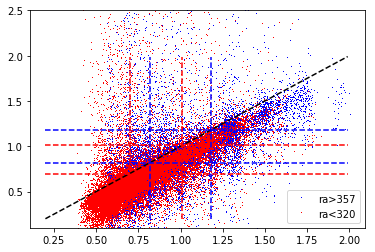

In [459]:
#0.68-1.68@0.85


sim_right = sim[(sim['ra']>357)&(sim['ra']<360)][:25035]
plt.plot(sim_right['sim_gflux'],sim_right['flux_g'],'b,',label = 'ra>357')
plt.gca().set_ylim(0.1,2.5)
#0.55-1.3
sim_left = sim[sim['ra']<320][:25035]
plt.plot(sim_left['sim_gflux'],sim_left['flux_g'],'r,',label = 'ra<320')
plt.legend()

x = np.arange(0.2,2.0,0.01)
y = x

y_red_low = np.ones(len(x))*left_flux_g_low
y_red_high = np.ones(len(x))*left_flux_g_high

y_blue_low = np.ones(len(x))*right_flux_g_low
y_blue_high = np.ones(len(x))*right_flux_g_high

plt.plot(x,y,'k--')
plt.plot(x,y_red_low,'r--')
plt.plot(x,y_red_high,'r--')
plt.plot(x,y_blue_low,'b--')
plt.plot(x,y_blue_high,'b--')


plt.plot(y_red_low,x,'r--')
plt.plot(y_red_high,x,'r--')
plt.plot(y_blue_low,x,'b--')
plt.plot(y_blue_high,x,'b--')




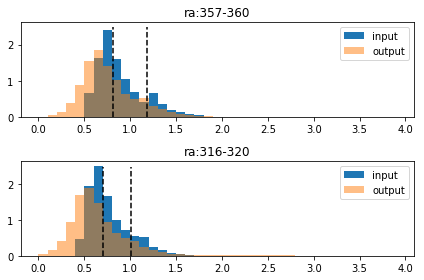

In [484]:
#0.68-1.68@0.85

plt.subplot(2,1,1)

#plt.subplot(2,1,1)
sim_right = sim[(sim['ra']>357)&(sim['ra']<360)][:25035]
plt.hist(sim_right['sim_gflux'],label = 'input',normed = True, bins = np.arange(0,4,0.1))
plt.hist(sim_right['flux_g'],label = 'output',normed = True, bins = np.arange(0,4,0.1),alpha = 0.5)
plt.legend()

x = np.arange(0,2.5,0.01)

y_blue_low = np.ones(len(x))*right_flux_g_low
y_blue_high = np.ones(len(x))*right_flux_g_high


plt.plot(y_blue_low,x,'k--')
plt.plot(y_blue_high,x,'k--')
plt.title('ra:357-360')

'''
plt.subplot(2,1,2)
#0.55-1.3
sim_left = sim[sim['ra']<320][:25035]
plt.plot(sim_left['sim_gflux'],sim_left['flux_g'],'r,',label = 'ra<320')
plt.legend()
'''

plt.subplot(2,1,2)



sim_left = sim[(sim['ra']<320)][:25035]
plt.hist(sim_left['sim_gflux'],label = 'input',normed = True, bins = np.arange(0,4,0.1))
plt.hist(sim_left['flux_g'],label = 'output',normed = True, bins = np.arange(0,4,0.1),alpha = 0.5)
plt.legend()

x = np.arange(0,2.5,0.01)

y_low = np.ones(len(x))*left_flux_g_low
y_high = np.ones(len(x))*left_flux_g_high


plt.plot(y_low,x,'k--')
plt.plot(y_high,x,'k--')
plt.title('ra:316-320')

plt.tight_layout()

In [463]:
n1 = len(sim_left[(sim_left['flux_g']>left_flux_g_low)&(sim_left['flux_g']<left_flux_g_high)])
n2 = len(sim_left[(sim_left['sim_gflux']>left_flux_g_low)&(sim_left['sim_gflux']<left_flux_g_high)])

u1 = len(sim_right[(sim_right['flux_g']>right_flux_g_low)&(sim_right['flux_g']<right_flux_g_high)])
u2 = len(sim_right[(sim_right['sim_gflux']>right_flux_g_low)&(sim_right['sim_gflux']<right_flux_g_high)])

print(n1/n2,u1/u2)

0.5934354986276303 0.7157384987893463


In [455]:
sim_left['mw_transmission_g'].mean(),sim_right['mw_transmission_g'].mean()

left_flux_g_low = 10**((-g_high+22.5)/2.5)*sim_left['mw_transmission_g'].mean()
left_flux_g_high = 10**((-g_low+22.5)/2.5)*sim_left['mw_transmission_g'].mean()

right_flux_g_low = 10**((-g_high+22.5)/2.5)*sim_right['mw_transmission_g'].mean()
right_flux_g_high = 10**((-g_low+22.5)/2.5)*sim_right['mw_transmission_g'].mean()

In [456]:
left_flux_g_low,left_flux_g_high,right_flux_g_low,right_flux_g_high

(0.69812948748738402,
 1.0091041263447349,
 0.8164829221449913,
 1.1801768878032197)

In [430]:
print(len(sim_right[(sim_right['flux_g']>0.68)&(sim_right['flux_g']<0.85)])/len(sim_right))
print(len(sim_left[(sim_left['flux_g']>0.68)&(sim_left['flux_g']<0.85)])/len(sim_left))

0.2084177860226505
0.1481925304573597


(0.1, 3)

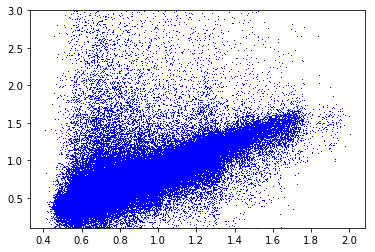

In [424]:
sim_right = sim[sim['ra']>340]
plt.plot(sim_right['sim_gflux'],sim_right['flux_g'],'b,')
plt.gca().set_ylim(0.1,3)